# Test of Image Processing Workflows by Tobias

In [129]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep

In [130]:
from PIL import Image

In [131]:
import io

In [132]:
@is_fairstep(label='Rotating an image represented as a string by 180 degrees')
def rotate_image(imgstr:str) -> str:
    imgIn = Image.open(io.BytesIO(imgstr))
    imgOut = imgIn.transpose(Image.ROTATE_180)
    imgOutStr = io.BytesIO()
    imgOut.save(imgOutStr, format="png")
    return imgOutStr.getvalue()

In [133]:
#FairStep.from_function(rotate_image).publish_as_nanopub()

In [141]:
@is_fairstep(label='Resize image')
def resize_image(imgStr:str) -> str:
    """Resize the image 300x300 """
    from PIL import Image
    image = Image.open(io.BytesIO(imgStr))
    new_image = image.resize((300, 300))
    imgOut = io.BytesIO()
    new_image.save(imgOut, format="png")
    return imgOut.getvalue()

In [135]:
@is_fairworkflow(label='My Workflow')
def my_workflow(imgstr:str) -> str:
    return resize_image(rotate_image(imgstr))

In [136]:
im = Image.open("img1.png")
#im.transpose(Image.ROTATE_90).show()

In [137]:
imageOut = io.BytesIO()
im.save(imageOut, format="png")
imgagestr = imageOut.getvalue()

In [138]:
fw = my_workflow(imgagestr)
result, prov = fw.execute()

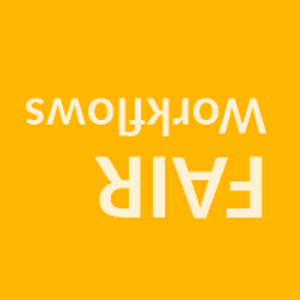

In [140]:
Image.open(io.BytesIO(result))